#K-Means Cluster Selection Lab

## 1. Introduction


### Intro and objectives


### In this lab you will learn:
1. An example of K-Means
### What I hope you'll get out of this lab
* Worked Examples
* How to interpret the results obtained

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np



In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## 2. Load and check data
### 2.1 Let's create some synthetic data

In [4]:
# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)


### 2.2 Let's observe the data we have

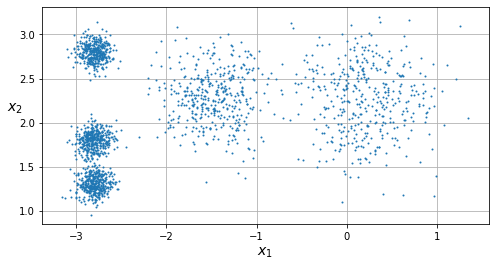

In [8]:
# extra code – this cell generates and saves Figure 9–2

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()


plt.show()

## 3. Let's find the optimal number of clusters
#### In this case it is quite clear that there are 5 clusters. In real life we usually require some previous analysis to determine the optimal number of clusters

### 3.1 The Elbow method

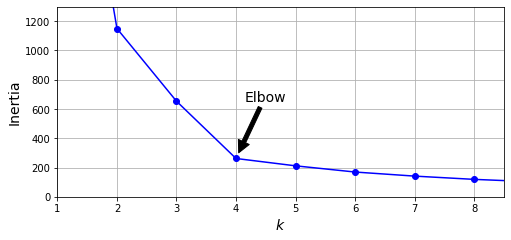

In [16]:
# extra code – this cell generates and saves Figure 9–8

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()

plt.show()

#### As you can see, the inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we keep increasing k. This curve has roughly the shape of an arm, and there is an elbow at k = 4. So, if we did not know better, we might think 4 was a good choice: any lower value would be dramatic, while any higher value would not help much, and we might just be splitting perfectly good clusters in half for no good reason.

### 3.2 The Silhouette method

In [17]:
from sklearn.metrics import silhouette_score

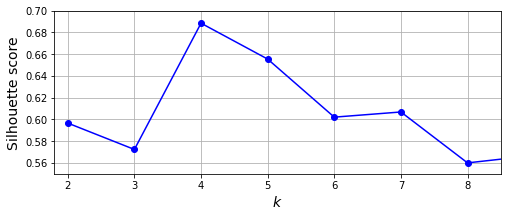

In [19]:


silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()

plt.show()

#### As you can see, this visualization is much richer than the previous one: in particular, although it confirms that is a very good choice, but it also underlines the fact that is quite good as well.

#### An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram:

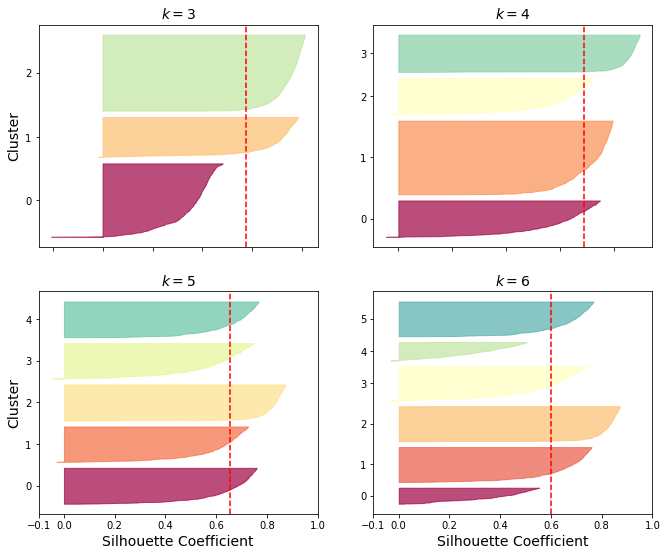

In [21]:
# extra code – this cell generates and saves Figure 9–10

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

Each diagram contains one knife shape per cluster. The
shape’s height indicates the number of instances in the cluster, and its width
represents the sorted silhouette coefficients of the instances in the cluster
(wider is better).
The vertical dashed lines represent the mean silhouette score for each
number of clusters. When most of the instances in a cluster have a lower
coefficient than this score (i.e., if many of the instances stop short of the
dashed line, ending to the left of it), then the cluster is rather bad since this
means its instances are much too close to other clusters. Here we can see
that when k = 3 or 6, we get bad clusters. But when k = 4 or 5, the clusters
look pretty good: most instances extend beyond the dashed line, to the right
and closer to 1.0. When k = 4, the cluster at index 1 (the second from the
bottom) is rather big. When k = 5, all clusters have similar sizes. So, even
though the overall silhouette score from k = 4 is slightly greater than for k =
5, it seems like a good idea to use k = 5 to get clusters of similar sizes.